# Predicting the Sale Price of a House in Ames, Iowa

### Feature Engineering and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, Ridge, RidgeCV

In [2]:
# Load cleaned data from cleaned_train.csv in datasets folder
path = '../datasets/'
file_name = 'cleaned_train.csv'
houses = pd.read_csv(path + file_name)

### Feature Engineering
Create a new feature 'House Age' to represent how old the house was when it was sold.

In [3]:
houses['House Age'] = houses['Yr Sold'] - houses['Year Remod/Add']

In [5]:
houses['House Age'] = houses['House Age'].map(lambda age: age if age>0 else 0)

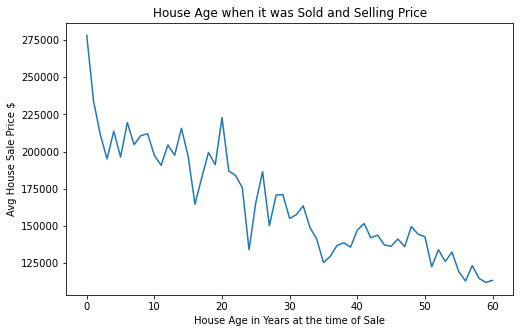

In [6]:
plt.figure(figsize = (8, 5))
age = houses.groupby('House Age')['SalePrice'].mean()
age.sort_index().plot.line();
plt.xlabel('House Age in Years at the time of Sale')
plt.ylabel('Avg House Sale Price $')
plt.title('House Age when it was Sold and Selling Price');

Create dummy features for the categorical data

In [7]:
features_to_change = list(houses.select_dtypes([np.object]).columns)

In [8]:
houses = pd.get_dummies(houses, columns=features_to_change, drop_first=True)

In [9]:
# Export dataset with new features to a CSV file
houses.to_csv(path + 'new_features_cleaned_train.csv', index=False)

### Feature Selection
Use correlation to find the features most correlated with the target value

In [11]:
cor = houses.corr()
#Correlation with target variable
cor_target = abs(cor['SalePrice'])

#Select features with correlation strength of 0.5 or above
relevant_features = cor_target[cor_target>0.5]
relevant_features

Overall Qual        0.805282
Year Built          0.583765
Year Remod/Add      0.552466
Total Bsmt SF       0.668989
Gr Liv Area         0.717217
Full Bath           0.536389
TotRms AbvGrd       0.506015
Garage Cars         0.649211
Garage Area         0.654190
SalePrice           1.000000
House Age           0.553579
Exter Qual_TA       0.604169
Foundation_PConc    0.537544
Kitchen Qual_TA     0.540977
Name: SalePrice, dtype: float64

In [12]:
relevant_features = list(relevant_features.index)

In [13]:
relevant_features.remove('SalePrice')
relevant_features.remove('Year Remod/Add')
relevant_features.remove('House Age')

In [14]:
relevant_features

['Overall Qual',
 'Year Built',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Full Bath',
 'TotRms AbvGrd',
 'Garage Cars',
 'Garage Area',
 'Exter Qual_TA',
 'Foundation_PConc',
 'Kitchen Qual_TA']

In [15]:
# Create feature matrix (X) and target vector (y)
X = houses[relevant_features]
y = houses ['SalePrice']

In [16]:
# Perform a split of x and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
# Scale data
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [18]:
# Export transformed X Train data to a CSV file
Xs_train = pd.DataFrame(Xs_train)
Xs_train.columns = X.columns
Xs_train.to_csv(path + 'X_train_transformed.csv', index=False)

# Export transformed X Test data to a CSV file
Xs_test = pd.DataFrame(Xs_test)
Xs_test.to_csv(path + 'X_test_transformed.csv', index=False)

# Export y train data to a CSV file
y_train.to_csv(path + 'y_train.csv', index=False)

# Export y Test data to a CSV file
y_test.to_csv(path + 'y_test.csv', index=False)